In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def filter_backbone(backbone1:np.ndarray, ascending:bool=True):

    xidx, yidx, zidx = 1, 2, 3
    # boolean indicating if the particle is in the backbone
    b = np.zeros(backbone1.shape[0], dtype=np.int8)
    
    # sort backbone1 by y coordinate
    backbone1 = backbone1[backbone1[:,yidx].argsort()]
    #print(backbone1[:,yidx])
    yMin = np.min(backbone1[:,yidx])
    
    yMax = np.max(backbone1[:,yidx])
    
    yLayer = yMin if ascending else yMax

    yRange = range(yMin+1, yMax+1) if ascending else range(yMax-1, yMin-1, -1)
    
    # find all particles in the current layer
    idx_prev = np.where(backbone1[:,yidx] == yLayer)[0]
    #print('primeira camada: %d' %len(idx_prev))
    # mark the particles in the current layer that are neighbors of the previous layer
    b[idx_prev] = 1
    
    for yLayer in yRange:
        
        # find all particles in the current layer
        idx = np.where(backbone1[:,yidx] == yLayer)[0]
        #print('camada %d: %d' %(yLayer,len(idx)))
        # for all particle in the current layer, check if they are neighbors of the previous layer
        idxB = []
        for i in idx:
            xzB = backbone1[i][[xidx, zidx]]
            for j in idx_prev:
                xzP = backbone1[j][[xidx, zidx]]
                if np.all(xzB == xzP):
                    idxB.append(i)
                    break

        # raise exception if idxB is empty
        if len(idxB) == 0:
            print('no particles in layer!!!')
            return False
            #if(np.abs(yLayer - np.min(backbone1[:,2])) > np.abs(yLayer - np.max(backbone1[:,2]))):
                #print('aqui')
                #return np.min(backbone1[:,2]),yLayer
            #else:
                #return yLayer,np.max(backbone1[:,2])
            break
            raise Exception('No particles found on layer %d' % yLayer)
        
        
        #print('quantos na camada %d tem vizinhos na camada %d: %d' %(yLayer, yLayer - 1, len(idxB)) )
        # find neighbors in current layer considering xidx and zidx
        xzB = backbone1[idxB][:,[xidx,zidx]]
        idxL = list(set(idx) - set(idxB)) # index of particles in the level but not in idxB
        xzN = backbone1[idxL][:,[xidx,zidx]]
        idxN = [] # list of indices of particles to be added
        for k, i in enumerate(idxL):
            xzn = xzN[k]
            keep = False
            # searching for neighbors of each partcile in the current layer
            for xzb in xzB:
                if np.sum(np.abs(xzn-xzb)) == 1:
                    #print('entrou')
                    # there is a neighbor in the current layer
                    keep = True
                    break
            if keep:
                idxN.append(i)

        # mark the particles in the current layer that are neighbors of the previous layer
        idx_prev = np.array(idxB + idxN, dtype=np.int32)
        
        #print('total adicionado ao backbone: %d' %len(idx_prev))
        b[idx_prev] = 1
    return backbone1[b==1]

def get_second_index(item):
    return item[1]

In [3]:
i = '/home/robert/Dropbox/data/files/particles/mode_s_ts_100_nb_20000_seed_103_.dat'
backbone1 = []

## Read file particles
print('reading', i)
with open(i, 'r') as fid:
    for row in fid:
        row = row.split()
        # extract the fiber center (rectangular trapezoid)
        v = np.zeros(5)
        if -8 <= int(row[2]) <=8:
            if -8 <= int(row[4]) <=8:
                if -100 <= int(row[3]) <=100:
                    #print(row)
                    v = [
                        int(row[1]),  # particle id
                        int(row[2]),  # x
                        int(row[3]),  # y
                        int(row[4]),  # z                        
                    ]
                    backbone1.append(v)

backbone1 = np.array(backbone1, dtype=np.int32)
#print(len(backbone1))
#np.savetxt('./testeback.txt',backbone1,fmt='%f')

## Filter backbone
bb2 = filter_backbone(backbone1, ascending=True)
#print('subiu')
bb3 = filter_backbone(bb2, ascending=False)
#print('desceu')

#np.savetxt('./bb3.txt',bb3,fmt='%d')

print(len(bb3))

## Test of stress/strain in active skeleton
act_skeleton = np.copy(bb3)
# Read the lines and split them into lists


act_skeleton = np.array(act_skeleton, dtype=int)
#print(act_skeleton)
idsRods = np.unique(act_skeleton[:,0])
idsRods = list(idsRods)
Vizinhos = {}
print(len(idsRods))
listNodes = []
for id in idsRods:
    #print(id)
    sitio = np.array(act_skeleton[act_skeleton[:,0] == id])[:,1:]
    #print(sitio)
    vizinhos = [act_skeleton[np.sum((i - act_skeleton[:,1:])**2,axis = 1) == 1].tolist() for i in sitio]
    vizinhos = [i for i in vizinhos if(i != [])]
    vizinhos = [item for sublist in vizinhos for item in sublist]
    vizinhos = np.array([i for i in vizinhos if(i[0] != id)])
    n_ = np.unique(vizinhos[:,0])
    n__ = len(vizinhos)
    for i in n_:
        listNodes.append([id,i])
    #print(edge_list)
    #print(id, n_)
    Vizinhos[id] = n__
print(listNodes)
print(Vizinhos)
print(act_skeleton)

reading /home/robert/Dropbox/data/files/particles/mode_s_ts_100_nb_20000_seed_103_.dat
29871
1856
[[0, 1], [0, 2], [0, 31], [0, 43], [0, 55], [1, 0], [1, 3], [1, 4], [1, 7], [1, 8], [2, 0], [2, 3], [2, 15], [2, 28], [2, 34], [3, 1], [3, 2], [3, 5], [3, 6], [3, 17], [3, 21], [4, 1], [4, 5], [4, 6], [4, 10], [4, 12], [4, 27], [5, 3], [5, 4], [5, 11], [5, 16], [5, 26], [5, 38], [6, 3], [6, 4], [6, 7], [6, 23], [6, 26], [6, 29], [7, 1], [7, 6], [7, 9], [7, 10], [7, 14], [7, 21], [8, 1], [8, 12], [8, 31], [8, 82], [8, 1593], [9, 7], [9, 13], [9, 20], [9, 23], [9, 29], [9, 100], [9, 166], [10, 4], [10, 7], [10, 13], [10, 22], [10, 68], [11, 5], [11, 18], [11, 45], [11, 56], [11, 58], [11, 1593], [12, 4], [12, 8], [12, 32], [12, 68], [12, 81], [12, 135], [13, 9], [13, 10], [13, 19], [13, 24], [13, 61], [13, 139], [14, 7], [14, 15], [14, 22], [14, 157], [15, 2], [15, 14], [15, 21], [15, 36], [15, 91], [15, 494], [16, 5], [16, 17], [16, 18], [16, 93], [16, 375], [17, 3], [17, 16], [17, 28], [17

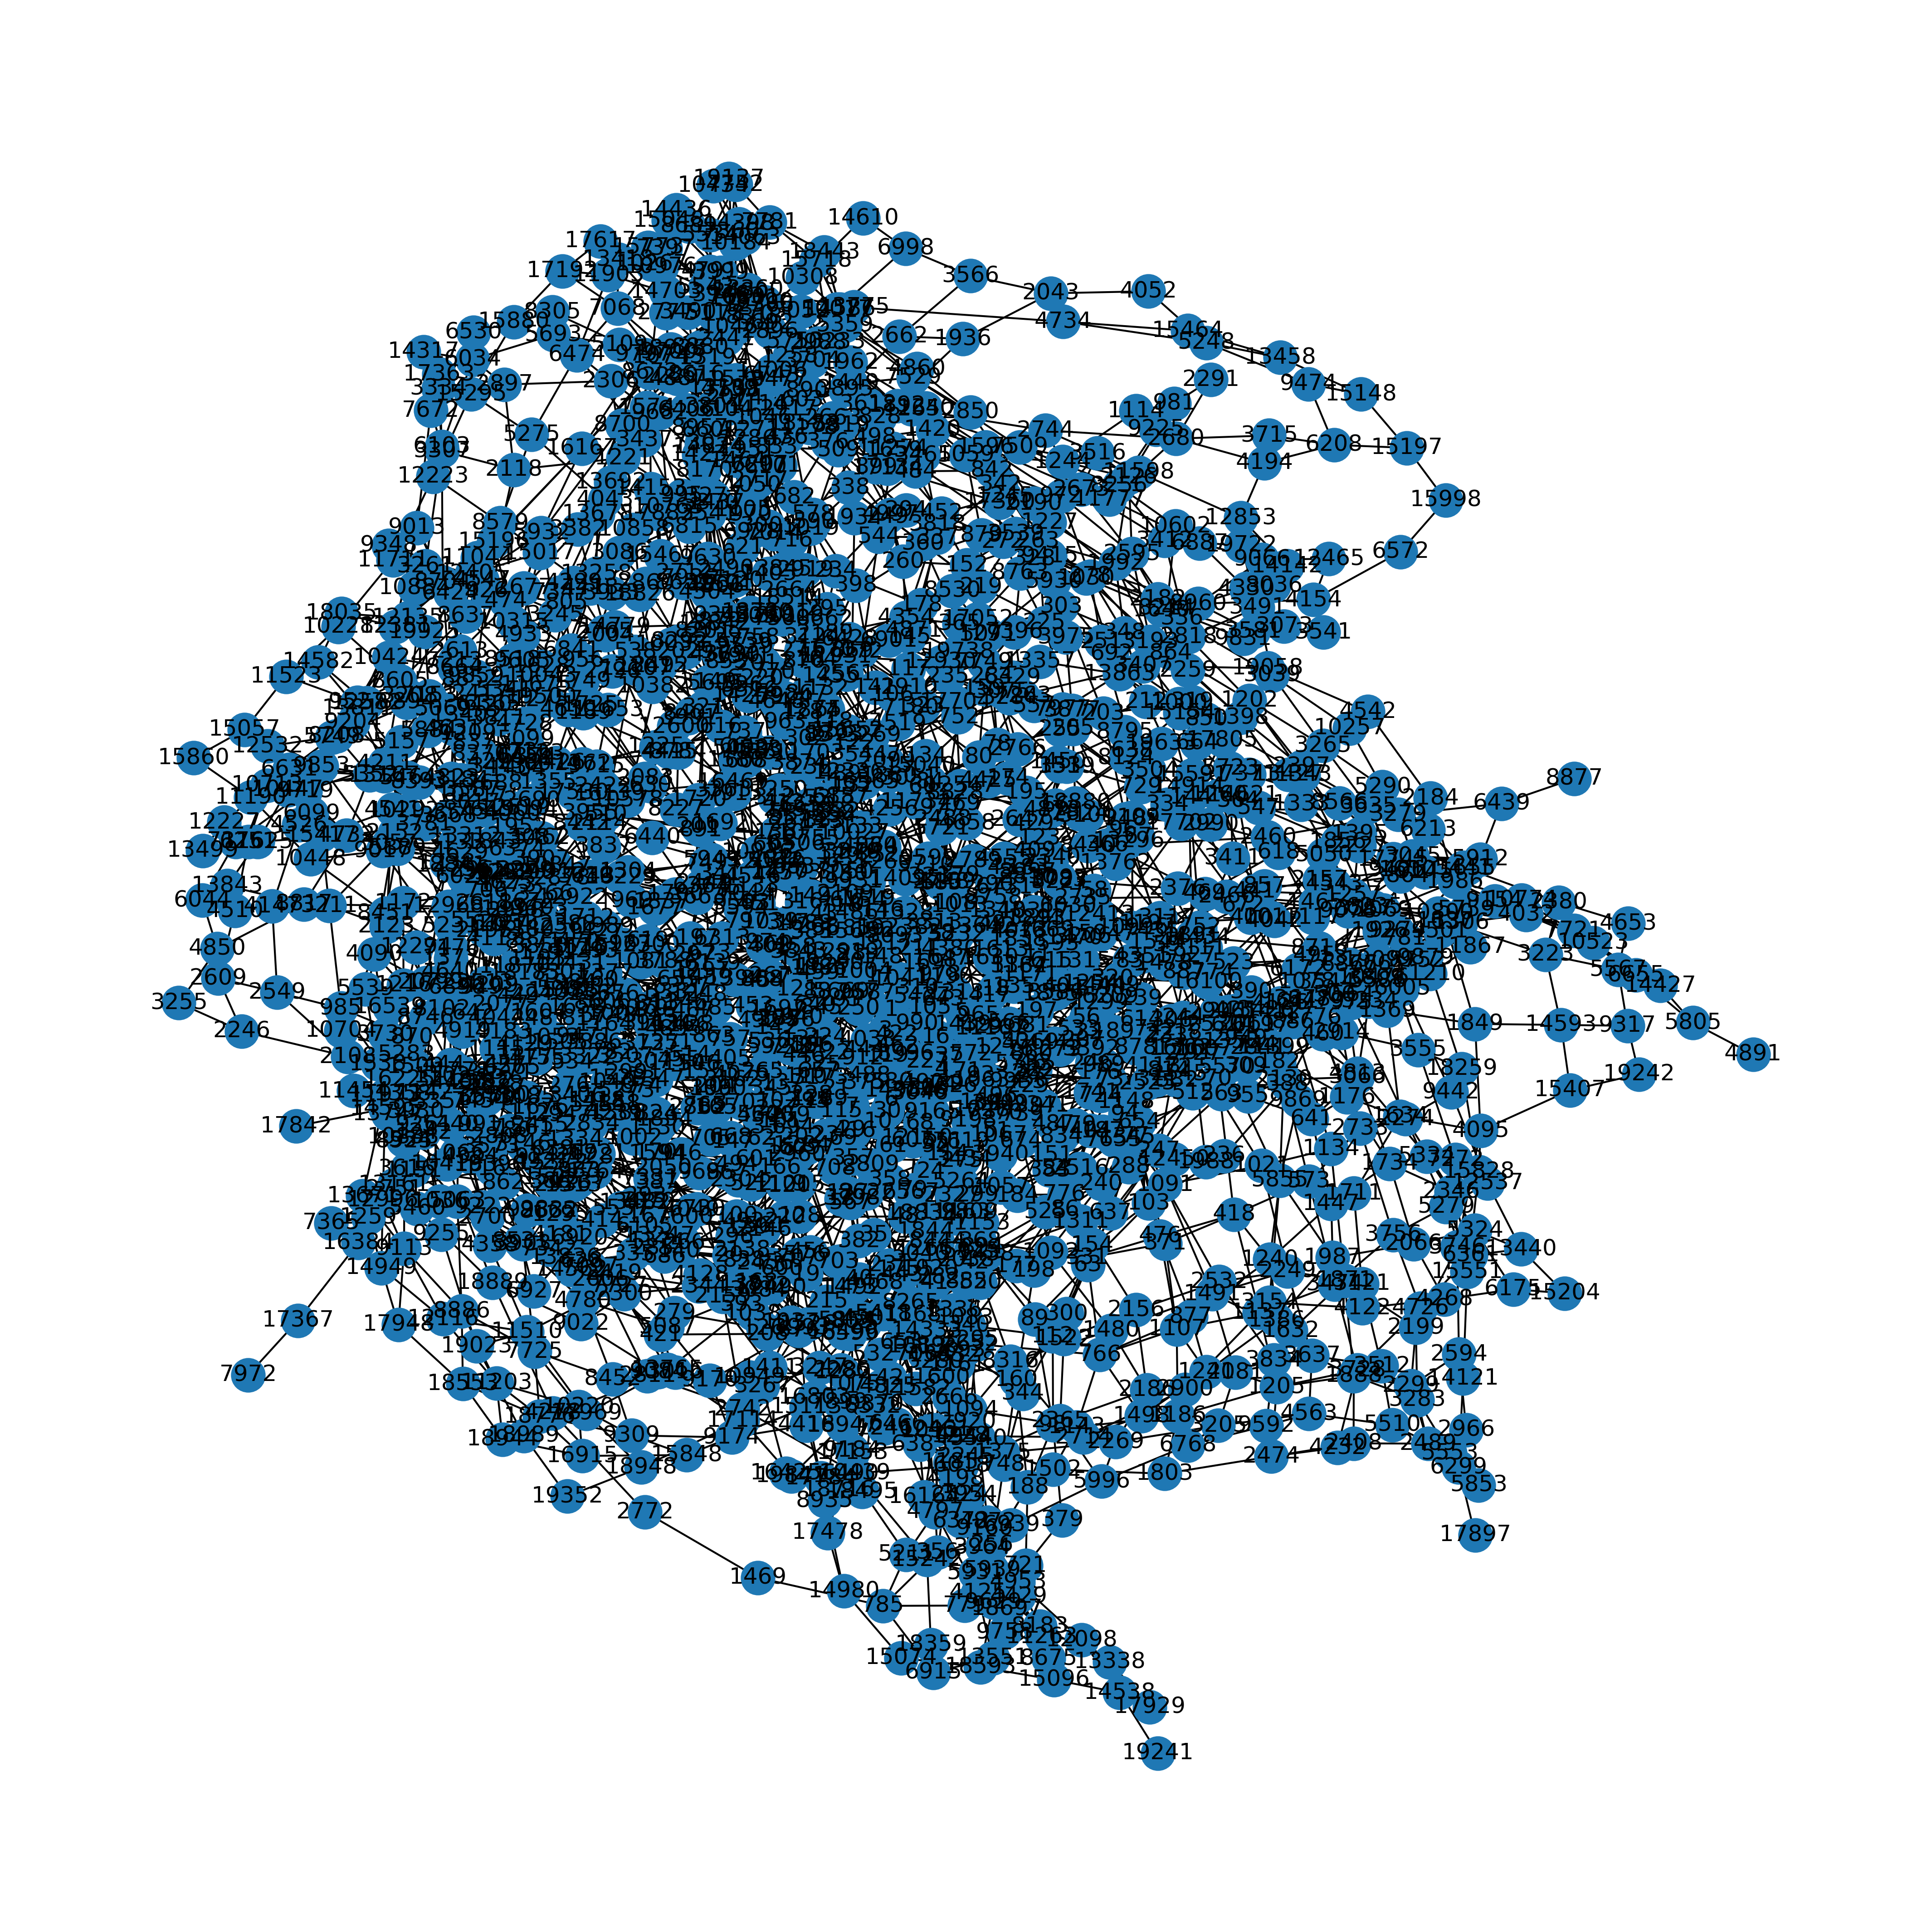

1856


In [4]:
plt.figure(figsize= (14,14), dpi = 300)
# Create an empty graph
G = nx.Graph()
#print(list)

# Add edges to the graph from the edge list
G.add_edges_from(listNodes)

# node colors
#node_colors = ['red'] * len(graph.nodes)


# Draw the graph using Matplotlib
nx.draw(G, with_labels=True)
plt.show()

print(len(G.nodes))

In [5]:
data = pd.read_csv("/home/robert/Dropbox/data/removed_parts_100_m2.txt", delimiter= '\t')

print(data)
ids_ = data['[]']
force = data['0']
list = ids_[ids_[:] !='[]'] 
lines = list.index
#print(list)
#print(list.loc[86])
Force = []
Ids = []
for i in lines:
    Force.append(force.loc[i])
    Ids.append(ids_.loc[i])



Ids = [eval(s) for s in Ids]


print(Force)
print(Ids)



         0                                                 []
0      0.5                                                 []
1      1.0                                                 []
2      1.5                                                 []
3      2.0                                                 []
4      2.5                                                 []
..     ...                                                ...
610  123.0        [285, 395, 520, 546, 668, 1421, 3218, 9170]
611  123.0  [86, 139, 166, 184, 387, 488, 703, 1028, 2286,...
612  123.0  [40, 168, 220, 513, 2195, 2367, 2455, 3085, 31...
613  123.0  [41, 231, 276, 279, 450, 2936, 3811, 4629, 845...
614  123.0                                                 []

[615 rows x 2 columns]
[18.5, 19.0, 23.5, 25.5, 28.0, 28.0, 29.5, 30.5, 31.0, 31.0, 31.0, 35.5, 35.5, 37.0, 37.5, 38.0, 39.0, 39.0, 40.5, 41.5, 41.5, 42.0, 42.0, 43.0, 45.5, 47.0, 47.0, 47.0, 47.5, 48.0, 48.0, 51.0, 51.5, 52.5, 53.0, 53.5, 54.0, 54.0, 54.

In [6]:
v = [j for i in Ids for j in i]
print(v)

[12465, 7899, 10838, 8675, 342, 500, 323, 1988, 1469, 1311, 9317, 618, 13499, 10257, 13551, 344, 6044, 13194, 15372, 686, 8935, 16225, 3266, 73, 2772, 5539, 12227, 3255, 6915, 6599, 337, 5460, 7307, 14610, 10308, 885, 2246, 1066, 1505, 4653, 7972, 3121, 3837, 485, 2727, 5567, 3541, 17929, 1114, 15196, 1844, 18359, 474, 1168, 9225, 724, 1725, 1711, 13458, 1891, 12450, 1634, 19841, 3801, 1030, 14980, 8017, 6406, 15947, 8877, 17805, 487, 145, 89, 3834, 6572, 15551, 17363, 4542, 4850, 238, 262, 4891, 19242, 236, 4154, 4510, 2609, 615, 693, 4278, 15407, 179, 14142, 981, 2291, 1538, 2662, 12968, 13843, 63, 1632, 9222, 409, 4533, 2897, 6998, 10523, 2380, 1284, 5749, 5542, 10017, 3512, 1240, 417, 1658, 19058, 9204, 9592, 18925, 17702, 19633, 15074, 422, 3566, 3715, 1347, 998, 4526, 9682, 576, 2811, 5374, 13167, 4060, 8817, 2422, 17897, 138, 1242, 1395, 5805, 15417, 15998, 19738, 11625, 7396, 6208, 4194, 14825, 3101, 336, 5441, 10315, 15197, 1227, 4540, 15718, 356, 1655, 2532, 6213, 2742, 18947

In [7]:
# calcular o grau de cada nó
degree_dict = dict(G.degree())

# determinar o grau de núcleo de cada nó
kcore_dict = nx.core_number(G)


In [10]:
degree_dict = dict(G.degree())
degree_dict_sep = {}
for degree in degree_dict.values():
    degree_dict_sep[degree] = []

# adicionar cada nó ao dicionário correspondente ao seu grau
for node, degree in degree_dict.items():
    degree_dict_sep[degree].append(node)

In [11]:
for degree, nodes in degree_dict_sep.items():
    print("Nós com grau", degree, ":", nodes)

Nós com grau 5 : [0, 1, 4, 2, 7, 15, 6, 19, 326, 8, 90, 14, 30, 23, 24, 142, 34, 110, 28, 29, 63, 64, 164, 102, 194, 72, 108, 50, 58, 73, 37, 205, 71, 103, 420, 143, 46, 57, 3722, 79, 81, 78, 247, 107, 1003, 59, 85, 203, 88, 106, 80, 129, 179, 200, 979, 115, 112, 89, 467, 232, 118, 274, 576, 121, 155, 157, 202, 127, 199, 413, 848, 196, 171, 172, 132, 201, 429, 303, 230, 1988, 421, 221, 154, 318, 328, 250, 193, 229, 4052, 302, 224, 215, 525, 313, 304, 222, 235, 417, 10583, 350, 996, 468, 532, 3418, 246, 500, 379, 327, 404, 2231, 659, 570, 389, 574, 337, 728, 305, 1029, 314, 754, 331, 655, 3506, 336, 782, 2117, 399, 373, 866, 381, 571, 1083, 506, 1302, 484, 439, 1120, 845, 733, 686, 743, 629, 715, 688, 1004, 721, 883, 932, 1104, 1750, 1909, 925, 1700, 994, 3359, 3845, 2597, 1207, 1624, 3039, 1608, 1724, 2141, 2290, 3513, 1714, 4547, 4293, 3654, 4838, 8479, 6255, 2754, 6005]
Nós com grau 4 : [25, 27, 65, 21, 3, 32, 5, 17, 125, 185, 11, 45, 26, 100, 9, 12, 16, 18, 56, 82, 98, 208, 39, 41, 

In [7]:
degree_list = list(dict(G.degree()).values())

In [7]:
F = G.copy()

In [8]:
is_connected = nx.is_connected(F)

if is_connected:
    # check if the graph has only one connected component
    num_components = nx.number_connected_components(F)
    if num_components == 1:
        print("The graph is fully connected.")
    else:
        print("The graph is not fully connected.")
else:
    print("The graph is not connected.")

The graph is fully connected.


In [9]:
# calcular o grau de cada nó
degree_dict = dict(F.degree())

# determinar o grau de núcleo de cada nó
kcore_dict = nx.core_number(F)

In [10]:
for node in F.nodes():
    print("O grau de núcleo do nó", node, "é", kcore_dict[node])

O grau de núcleo do nó 0 é 3
O grau de núcleo do nó 1 é 3
O grau de núcleo do nó 2 é 3
O grau de núcleo do nó 31 é 3
O grau de núcleo do nó 43 é 3
O grau de núcleo do nó 55 é 3
O grau de núcleo do nó 3 é 3
O grau de núcleo do nó 4 é 3
O grau de núcleo do nó 7 é 3
O grau de núcleo do nó 8 é 3
O grau de núcleo do nó 15 é 3
O grau de núcleo do nó 28 é 3
O grau de núcleo do nó 34 é 3
O grau de núcleo do nó 5 é 3
O grau de núcleo do nó 6 é 3
O grau de núcleo do nó 17 é 3
O grau de núcleo do nó 21 é 3
O grau de núcleo do nó 10 é 3
O grau de núcleo do nó 12 é 3
O grau de núcleo do nó 27 é 3
O grau de núcleo do nó 11 é 3
O grau de núcleo do nó 16 é 3
O grau de núcleo do nó 26 é 3
O grau de núcleo do nó 38 é 3
O grau de núcleo do nó 23 é 3
O grau de núcleo do nó 29 é 3
O grau de núcleo do nó 9 é 3
O grau de núcleo do nó 14 é 3
O grau de núcleo do nó 82 é 3
O grau de núcleo do nó 1593 é 3
O grau de núcleo do nó 13 é 3
O grau de núcleo do nó 20 é 3
O grau de núcleo do nó 100 é 3
O grau de núcleo 

In [11]:
for node in v:
    print("O grau de núcleo do nó", node, "é", kcore_dict[node])
    F.remove_node(node)
    # calcular o grau de cada nó
    degree_dict = dict(F.degree())

    # determinar o grau de núcleo de cada nó
    kcore_dict = nx.core_number(F)

    is_connected = nx.is_connected(F)

    if is_connected:
        # check if the graph has only one connected component
        num_components = nx.number_connected_components(F)
        if num_components == 1:
            print("The graph is fully connected.")
        else:
            print("The graph is not fully connected.")
    else:
        print("The graph is not connected.")

O grau de núcleo do nó 12465 é 2
The graph is fully connected.
O grau de núcleo do nó 7899 é 2
The graph is fully connected.
O grau de núcleo do nó 10838 é 3
The graph is fully connected.
O grau de núcleo do nó 8675 é 1
The graph is fully connected.
O grau de núcleo do nó 342 é 2
The graph is fully connected.
O grau de núcleo do nó 500 é 2
The graph is fully connected.
O grau de núcleo do nó 323 é 3
The graph is fully connected.
O grau de núcleo do nó 1988 é 1
The graph is fully connected.
O grau de núcleo do nó 1469 é 2
The graph is fully connected.
O grau de núcleo do nó 1311 é 3
The graph is fully connected.
O grau de núcleo do nó 9317 é 2
The graph is fully connected.
O grau de núcleo do nó 618 é 2
The graph is fully connected.
O grau de núcleo do nó 13499 é 2
The graph is fully connected.
O grau de núcleo do nó 10257 é 2
The graph is fully connected.
O grau de núcleo do nó 13551 é 2
The graph is fully connected.
O grau de núcleo do nó 344 é 3
The graph is fully connected.
O grau d

In [10]:
print("Lista de graus:", np.unique(np.array(degree_list)))

Lista de graus: [1 2 3 4 5 6 7]


In [9]:
for node in G.nodes():
    print("O grau de núcleo do nó", node, "é", kcore_dict[node])

O grau de núcleo do nó 0 é 2
O grau de núcleo do nó 1 é 2
O grau de núcleo do nó 3 é 2
O grau de núcleo do nó 14 é 2
O grau de núcleo do nó 2 é 2
O grau de núcleo do nó 10 é 2
O grau de núcleo do nó 458 é 2
O grau de núcleo do nó 4 é 2
O grau de núcleo do nó 6 é 2
O grau de núcleo do nó 22 é 2
O grau de núcleo do nó 48 é 2
O grau de núcleo do nó 21 é 2
O grau de núcleo do nó 5 é 2
O grau de núcleo do nó 7 é 2
O grau de núcleo do nó 31 é 2
O grau de núcleo do nó 15 é 2
O grau de núcleo do nó 27 é 2
O grau de núcleo do nó 81 é 2
O grau de núcleo do nó 262 é 2
O grau de núcleo do nó 11 é 2
O grau de núcleo do nó 13 é 2
O grau de núcleo do nó 8 é 2
O grau de núcleo do nó 12 é 2
O grau de núcleo do nó 20 é 2
O grau de núcleo do nó 131 é 2
O grau de núcleo do nó 9 é 2
O grau de núcleo do nó 17 é 2
O grau de núcleo do nó 37 é 2
O grau de núcleo do nó 19 é 2
O grau de núcleo do nó 119 é 2
O grau de núcleo do nó 23 é 2
O grau de núcleo do nó 26 é 2
O grau de núcleo do nó 24 é 2
O grau de núcleo

In [11]:
bcIds = []
centrality = nx.betweenness_centrality(G)
centrality_mesurement = []
for i in idsRods:

    centrality_mesurement.append([i, centrality[i]])
    
#print('Force: %f' %force[j])
for element in v:
    centrality = nx.betweenness_centrality(G)
    centrality_mesurement = []
    for i in idsRods:

        centrality_mesurement.append([i, centrality[i]])
    for i in centrality_mesurement:
        if i[0] == element:
            print('%d: %f' %(i[0], i[1]))
            G.remove_node(element)
            idsRods.remove(element)
            bcIds.append([i[0], i[1]])


12465: 0.000022
7899: 0.001764
10838: 0.000200
8675: 0.000000
342: 0.000304
500: 0.000294
323: 0.013714
1988: 0.000000
1469: 0.002042
1311: 0.002082
9317: 0.000288
618: 0.000199
13499: 0.000060
10257: 0.000149
13551: 0.000218
344: 0.000664
6044: 0.000300
13194: 0.001019
15372: 0.000078
686: 0.000844
8935: 0.000137
16225: 0.000543
3266: 0.000939
73: 0.006540
2772: 0.000000
5539: 0.000435
12227: 0.000006
3255: 0.000130
6915: 0.000000
6599: 0.000067
337: 0.000211
5460: 0.000324
7307: 0.000617
14610: 0.000008
10308: 0.000000
885: 0.001318
2246: 0.000418
1066: 0.000541


KeyboardInterrupt: 

In [15]:
bcIds

[[776, 0.004651162790697674],
 [823, 0.0],
 [1235, 0.0],
 [3392, 0.0],
 [2202, 0.0],
 [327, 0.014121850111921448],
 [220, 0.0],
 [38, 0.0],
 [635, 0.0],
 [995, 0.0],
 [52, 0.012100658372151837],
 [171, 0.0],
 [452, 0.004651162790697674],
 [1574, 0.0],
 [170, 0.0],
 [556, 0.004651162790697674],
 [1294, 0.004651162790697675],
 [104, 0.0966038706167455],
 [271, 0.0],
 [540, 0.004651162790697674],
 [611, 0.0],
 [133, 0.0],
 [12067, 0.0],
 [616, 0.0],
 [135, 0.0],
 [27, 0.008247798463216082],
 [743, 0.0007053344995944881],
 [1090, 0.0],
 [174, 0.001156971416889337],
 [294, 0.0026049520386680052],
 [809, 0.032785012243421015],
 [467, 0.004995544751407431],
 [232, 0.0],
 [1401, 0.0],
 [440, 0.00020957665777961767],
 [2069, 0.0],
 [299, 0.0],
 [42, 0.011586470125325016],
 [63, 0.003208705824326434],
 [81, 0.016335713305309824],
 [413, 0.0],
 [567, 0.0010794438120019514],
 [124, 0.006435423168247247],
 [181, 0.00029709608579439123],
 [391, 0.0011691151226034945],
 [724, 0.0],
 [785, 0.001145624

In [ ]:
idsRemoved = []
force = np.array(Force)
force = np.unique(force)
indices = []
list__ = []

print(force)
for value in force:
    
    indices.append(np.where(Force == value)[0])

print(list__)
for i in indices:
    List = []
    for j in i:
        List = List + Ids[j]
    print(List)
    idsRemoved.append(List)
        
    

print(idsRemoved)
print(len(force))

In [13]:
idsRemoved

[776, 823, 1235, 3392, 2202]

In [10]:
force

array([ 4. ,  5.5,  8.5,  9. ,  9.5, 10.5, 11. , 11.5, 12. , 14. , 14.5,
       15. ])

In [7]:
idsRemoved

[[776, 823, 1235, 3392, 2202],
 [327, 220],
 [38, 635, 995, 52, 171, 452],
 [1574],
 [170, 556, 1294, 104, 271, 540, 611, 133, 12067, 616],
 [135, 27],
 [743, 1090, 174, 294, 809, 467],
 [232, 1401, 440, 2069, 299],
 [42, 63, 81, 413, 567],
 [124, 181, 391, 724, 785, 528, 131, 3179, 439, 291, 1049, 1416],
 [126, 6688, 41, 402, 71, 72, 775, 295, 365, 3, 97, 109, 30],
 [251, 783, 243, 92, 394, 191, 319, 11, 118, 130, 486]]

In [6]:
for j in range(0,len(force)):

    centrality = nx.betweenness_centrality(G)
    centrality_mesurement = []
    for i in idsRods:

        centrality_mesurement.append([i, centrality[i]])
        
    print('Force: %f' %force[j])
    for element in idsRemoved[j]:
        for i in centrality_mesurement:
            if i[0] == element:
                print('%d: %f' %(i[0], i[1]))
                G.remove_node(element)
                idsRods.remove(element)


Force: 4.000000
776: 0.004651
823: 0.000000
1235: 0.000000
3392: 0.000000
2202: 0.000000
Force: 5.500000
327: 0.004910
220: 0.000000
Force: 8.500000
38: 0.000000
635: 0.000000
995: 0.000000
52: 0.012234
171: 0.000000
452: 0.004706
Force: 9.000000
1574: 0.000000
Force: 9.500000
170: 0.000000
556: 0.004773
1294: 0.000000
104: 0.095866
271: 0.000000
540: 0.004773
611: 0.000000
133: 0.000000
12067: 0.000000
616: 0.000000
Force: 10.500000
135: 0.000000
27: 0.008608
Force: 11.000000
743: 0.000714
1090: 0.000000
174: 0.000945
294: 0.001992
809: 0.027268
467: 0.005253
Force: 11.500000
232: 0.000000
1401: 0.000000
440: 0.000006
2069: 0.000000
299: 0.000000
Force: 12.000000
42: 0.005923
63: 0.003517
81: 0.021596
413: 0.000000
567: 0.000195
Force: 14.000000
124: 0.001524
181: 0.000160
391: 0.001270
724: 0.000000
785: 0.001244
528: 0.000000
131: 0.003002
3179: 0.000000
439: 0.000000
291: 0.000000
1049: 0.000000
1416: 0.000000
Force: 14.500000
126: 0.000000
6688: 0.000000
41: 0.060766
402: 0.000000

In [7]:
for j in range(0,len(force)):

    centrality = nx.betweenness_centrality(F)
    centrality_mesurement = []
    for i in idsRods:

        centrality_mesurement.append([i, centrality[i]])

    centrality_mesurement.sort(key = get_second_index)

    c = 0
    for value in centrality_mesurement:
        if value[1] ==0:
            c+=1
    print(c)
    firstIds = []
    for i in centrality_mesurement:
        if i[1] == 0:
            firstIds.append(i[0])

    print('Force: %f' %force[j])
    for element in idsRemoved[j]:
        if element in firstIds:
            print(element, "is in large_list")
            F.remove_node(element)
            idsRods.remove(element)
            
        else:
            print(element, "is not in large_list")




    

74
Force: 4.000000
776 is not in large_list
823 is in large_list
1235 is in large_list
3392 is in large_list
2202 is in large_list
71
Force: 5.500000
327 is not in large_list
220 is in large_list
70
Force: 8.500000
38 is in large_list
635 is in large_list
995 is in large_list
52 is not in large_list
171 is in large_list
452 is not in large_list
66
Force: 9.000000
1574 is in large_list
66
Force: 9.500000
170 is in large_list
556 is not in large_list
1294 is in large_list
104 is not in large_list
271 is in large_list
540 is not in large_list
611 is in large_list
133 is in large_list
12067 is in large_list
616 is in large_list
61
Force: 10.500000
135 is in large_list
27 is not in large_list
61
Force: 11.000000
743 is not in large_list
1090 is in large_list
174 is not in large_list
294 is not in large_list
809 is not in large_list
467 is not in large_list
61
Force: 11.500000
232 is in large_list
1401 is in large_list
440 is not in large_list
2069 is in large_list
299 is in large_list
58
Fo

In [8]:
print(idsRods)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142, 143, 144, 147, 148, 149, 152, 153, 154, 158, 159, 160, 162, 163, 165, 170, 171, 173, 174, 175, 177, 179, 180, 181, 182, 183, 184, 189, 191, 192, 193, 195, 196, 197, 199, 200, 201, 202, 204, 206, 207, 208, 209, 211, 213, 216, 217, 220, 222, 226, 228, 230, 231, 232, 233, 234, 235, 237, 239, 243, 244, 251, 252, 254, 257, 258, 259, 261, 262, 266, 267, 268, 269, 271, 272, 278, 279, 280, 283, 284, 285, 288, 291, 294, 295, 296

In [16]:
def get_second_index(item):
    return item[1]
c = 0
Removed = []
for j in idsRemoved:
    #print(i)
    pre = []
    x = len(j)
    #print(x)
    c=0
    while c < x:
        
        print('G: %d' %G.number_of_nodes())
        centrality = nx.betweenness_centrality(G)
        centrality_mesurement = []
        for i in idsRods:

            centrality_mesurement.append([i, centrality[i]])

        
        centrality_mesurement.sort(key = get_second_index)
        if centrality_mesurement == []:
            break
        print(centrality_mesurement[0][0])
        #print(centrality_mesurement)

        ## Remove node
        G.remove_node(centrality_mesurement[0][0])
        pre.append(centrality_mesurement[0][0])
        idsRods.remove(centrality_mesurement[0][0])
        c+=1
    print('saiu')
    print(pre)
    Removed.append(pre)



G: 431
38
G: 430
72
G: 429
97
G: 428
100
G: 427
133
saiu
[38, 72, 97, 100, 133]
G: 426
135
G: 425
136
saiu
[135, 136]
G: 424
170
G: 423
171
G: 422
220
G: 421
232
G: 420
237
G: 419
231
saiu
[170, 171, 220, 232, 237, 231]
G: 418
132
saiu
[132]
G: 417
268
G: 416
271
G: 415
126
G: 414
279
G: 413
285
G: 412
291
G: 411
295
G: 410
120
G: 409
118
G: 408
83
saiu
[268, 271, 126, 279, 285, 291, 295, 120, 118, 83]
G: 407
298
G: 406
299
saiu
[298, 299]
G: 405
382
G: 404
392
G: 403
413
G: 402
528
G: 401
534
G: 400
452
saiu
[382, 392, 413, 528, 534, 452]
G: 399
162
G: 398
588
G: 397
604
G: 396
611
G: 395
616
saiu
[162, 588, 604, 611, 616]
G: 394
629
G: 393
635
G: 392
641
G: 391
724
G: 390
766
saiu
[629, 635, 641, 724, 766]
G: 389
776
G: 388
797
G: 387
540
G: 386
322
G: 385
823
G: 384
866
G: 383
796
G: 382
487
G: 381
827
G: 380
905
G: 379
991
G: 378
992
saiu
[776, 797, 540, 322, 823, 866, 796, 487, 827, 905, 991, 992]
G: 377
995
G: 376
1016
G: 375
1079
G: 374
1090
G: 373
606
G: 372
1203
G: 371
1207
G:

In [37]:
# rods removed from force
idsRemoved

[[776, 823, 1235, 3392, 2202],
 [327, 220],
 [38, 635, 995, 52, 171, 452],
 [1574],
 [170, 556, 1294, 104, 271, 540, 611, 133, 12067, 616],
 [135, 27],
 [743, 1090, 174, 294, 809, 467],
 [232, 1401, 440, 2069, 299],
 [42, 63, 81, 413, 567],
 [124, 181, 391, 724, 785, 528, 131, 3179, 439, 291, 1049, 1416],
 [126, 6688, 41, 402, 71, 72, 775, 295, 365, 3, 97, 109, 30],
 [251, 783, 243, 92, 394, 191, 319, 11, 118, 130, 486]]

In [21]:
## rods removed with bc
Removed

[[38, 72, 97, 100, 133],
 [135, 136],
 [170, 171, 220, 232, 237, 231],
 [132],
 [268, 271, 126, 279, 285, 291, 295, 120, 118, 83],
 [298, 299],
 [382, 392, 413, 528, 534, 452],
 [162, 588, 604, 611, 616],
 [629, 635, 641, 724, 766],
 [776, 797, 540, 322, 823, 866, 796, 487, 827, 905, 991, 992],
 [995, 1016, 1079, 1090, 606, 1203, 1207, 1214, 1235, 1304, 1327, 1381, 556],
 [1401, 1416, 938, 1574, 1294, 1584, 878, 319, 1682, 1744, 195]]

In [23]:
F.nodes

NodeView((0, 1, 3, 14, 2, 10, 458, 4, 6, 22, 48, 21, 5, 7, 31, 15, 27, 81, 262, 11, 13, 8, 12, 20, 131, 9, 17, 37, 19, 119, 23, 26, 24, 32, 53, 4200, 16, 18, 25, 40, 28, 35, 33, 38, 43, 201, 49, 58, 46, 29, 34, 60, 39, 42, 30, 92, 121, 114, 36, 410, 47, 104, 44, 63, 90, 41, 57, 68, 61, 64, 45, 72, 55, 52, 78, 103, 413, 991, 88, 110, 3520, 116, 67, 69, 50, 62, 491, 191, 95, 107, 805, 51, 54, 59, 99, 125, 66, 94, 136, 56, 305, 199, 80, 91, 261, 75, 743, 733, 84, 70, 82, 85, 87, 97, 646, 148, 417, 65, 834, 2424, 79, 89, 74, 177, 213, 71, 76, 86, 73, 105, 724, 128, 665, 153, 443, 450, 77, 83, 228, 308, 127, 122, 216, 96, 102, 143, 115, 202, 118, 93, 112, 124, 197, 160, 173, 193, 132, 140, 159, 101, 288, 111, 139, 100, 162, 134, 175, 900, 106, 1161, 109, 192, 812, 211, 631, 382, 905, 113, 251, 138, 200, 144, 130, 269, 366, 2738, 1079, 142, 184, 120, 133, 126, 295, 123, 163, 481, 783, 147, 181, 298, 999, 171, 182, 135, 271, 189, 158, 2129, 402, 439, 231, 149, 204, 243, 244, 183, 206, 154, 85

In [30]:
F.nodes

NodeView((0, 1, 3, 14, 2, 10, 458, 4, 6, 22, 48, 21, 5, 7, 31, 15, 27, 81, 262, 11, 13, 8, 12, 20, 131, 9, 17, 37, 19, 119, 23, 26, 24, 32, 53, 4200, 16, 18, 25, 40, 28, 35, 33, 38, 43, 201, 49, 58, 46, 29, 34, 60, 39, 42, 30, 92, 121, 114, 36, 410, 47, 104, 44, 63, 90, 41, 57, 68, 61, 64, 45, 72, 55, 52, 78, 103, 413, 991, 88, 110, 3520, 116, 67, 69, 50, 62, 491, 191, 95, 107, 805, 51, 54, 59, 99, 125, 66, 94, 136, 56, 305, 199, 80, 91, 261, 75, 743, 733, 84, 70, 82, 85, 87, 97, 646, 148, 417, 65, 834, 2424, 79, 89, 74, 177, 213, 71, 76, 86, 73, 105, 724, 128, 665, 153, 443, 450, 77, 83, 228, 308, 127, 122, 216, 96, 102, 143, 115, 202, 118, 93, 112, 124, 197, 160, 173, 193, 132, 140, 159, 101, 288, 111, 139, 100, 162, 134, 175, 900, 106, 1161, 109, 192, 812, 211, 631, 382, 905, 113, 251, 138, 200, 144, 130, 269, 366, 2738, 1079, 142, 184, 120, 133, 126, 295, 123, 163, 481, 783, 147, 181, 298, 999, 171, 182, 135, 271, 189, 158, 2129, 402, 439, 231, 149, 204, 243, 244, 183, 206, 154, 85

In [34]:
Removed = [j for i in Removed for j in i]

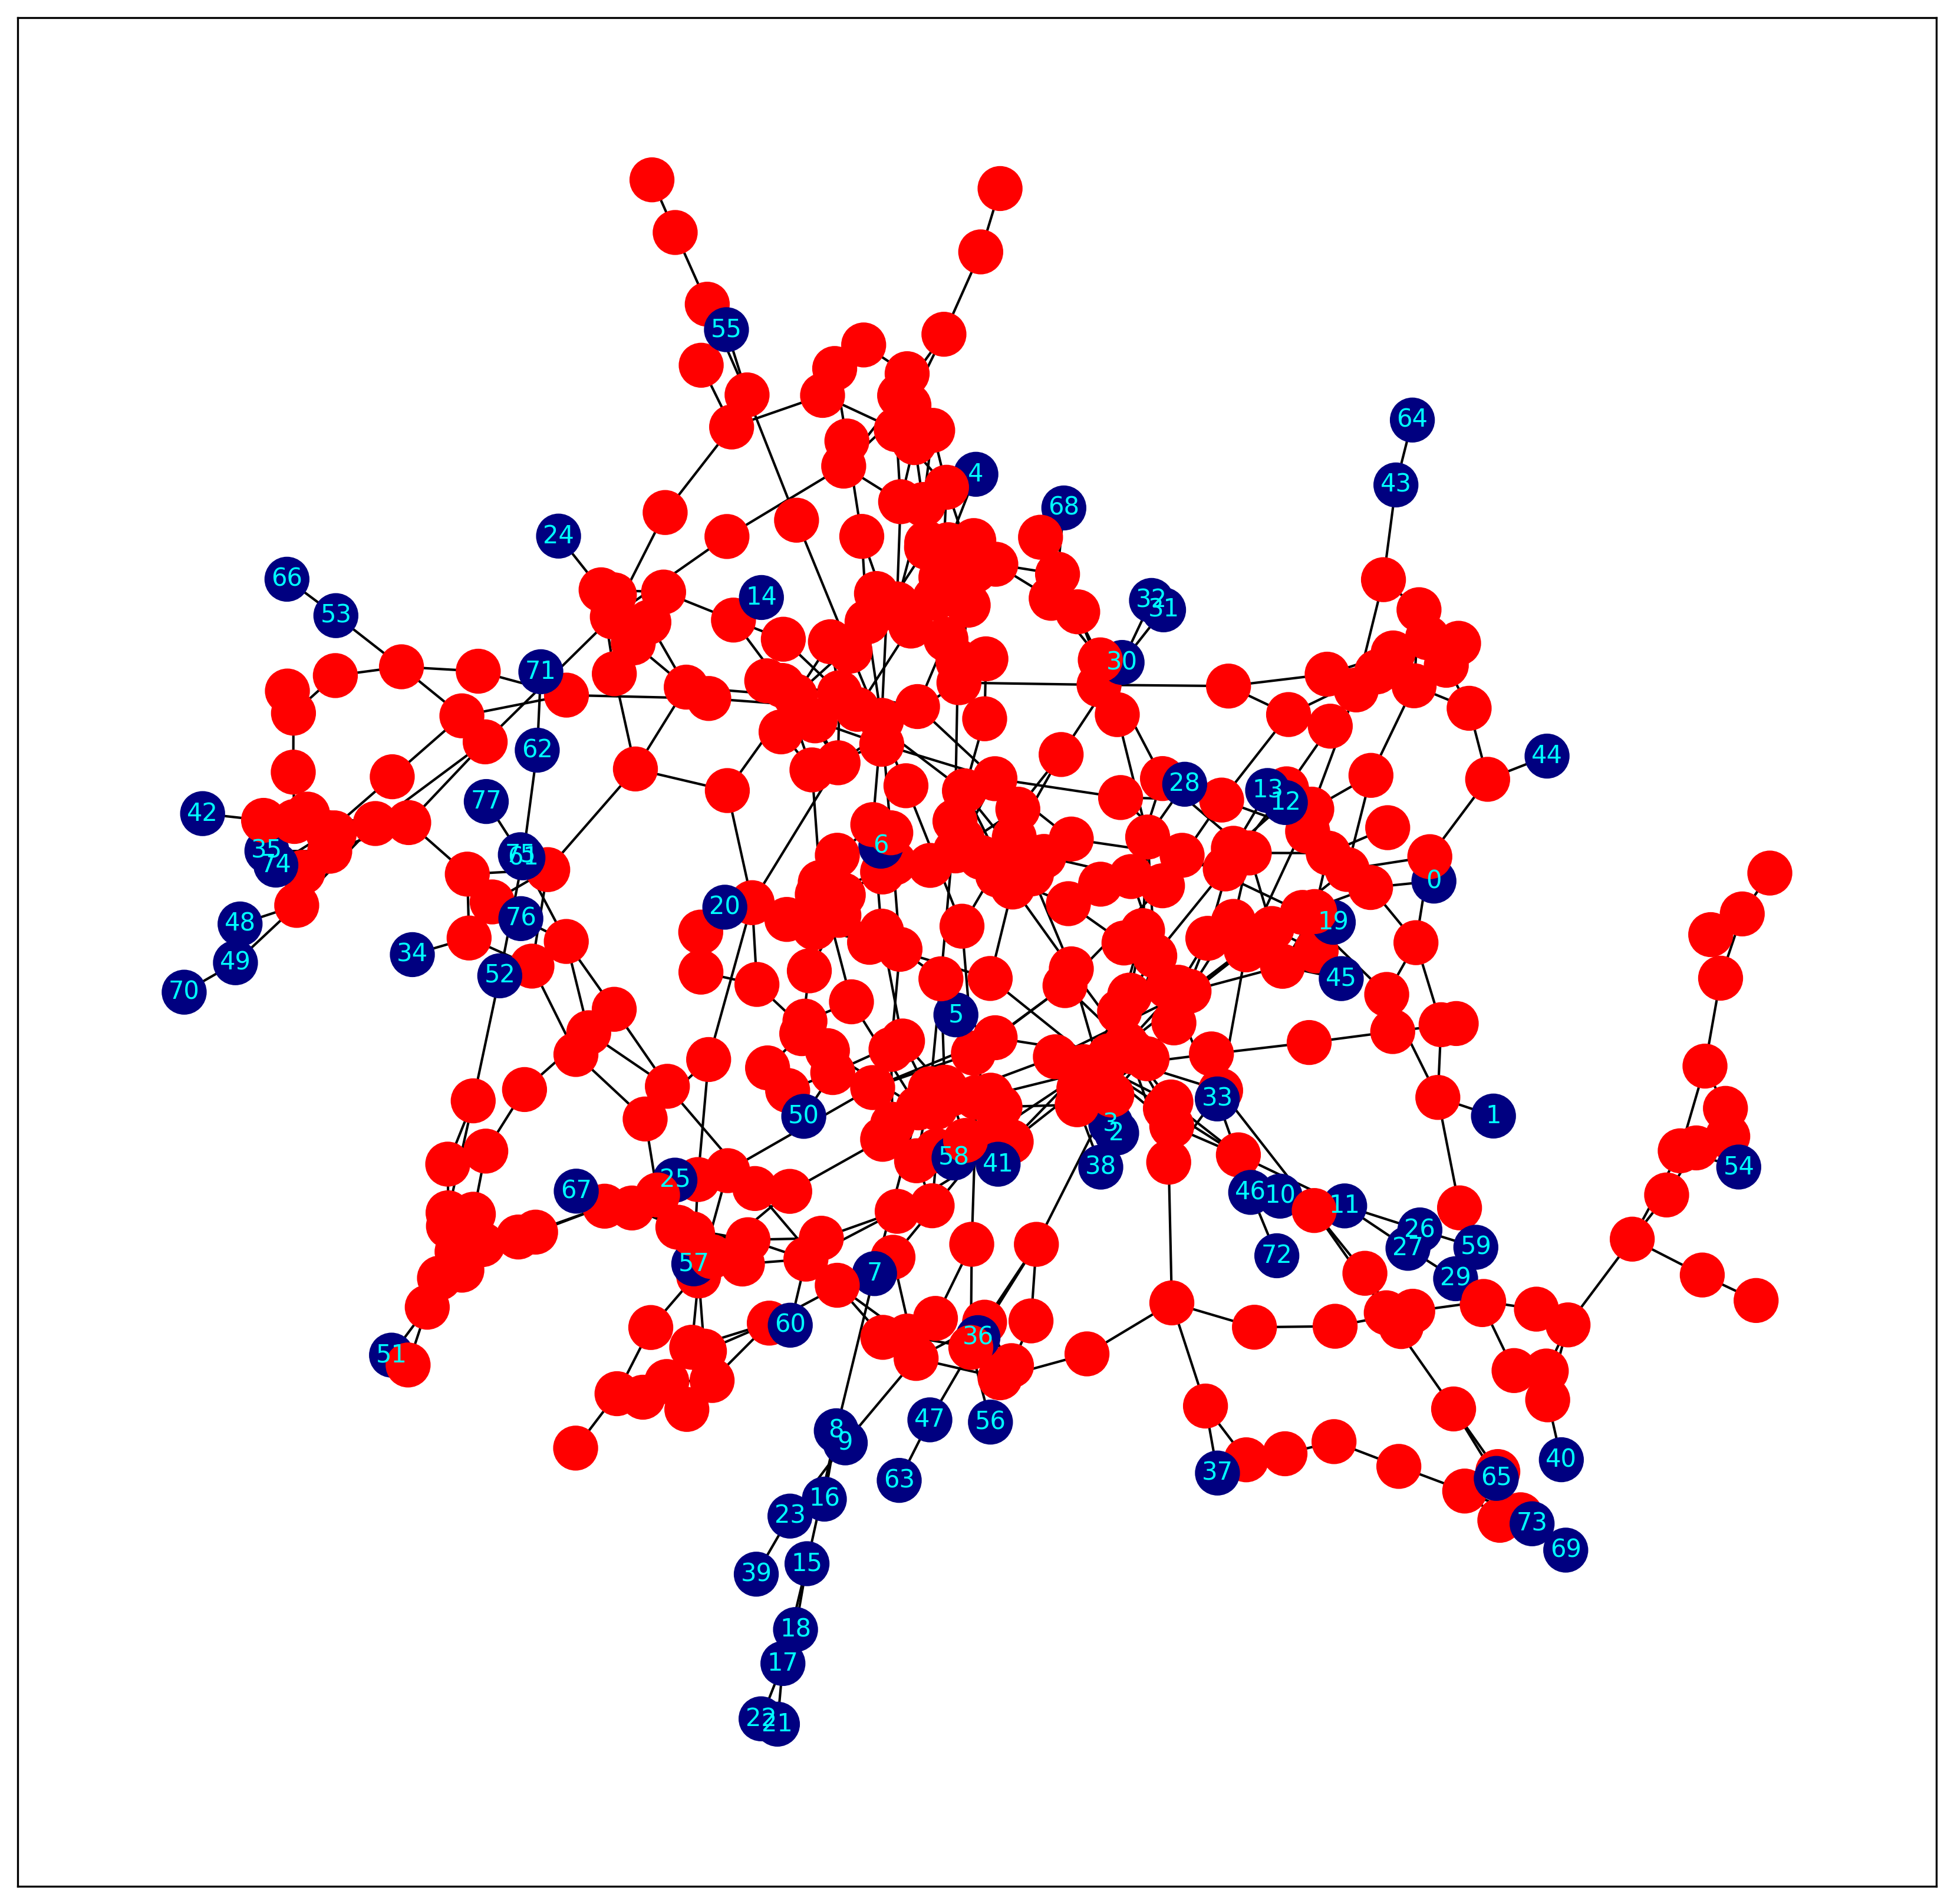

In [46]:
pos = nx.spring_layout(F)
plt.figure(figsize= (14,14), dpi =300)
# define as cores dos nós
colors = ['navy' if(i in Removed) else 'red' for i in F.nodes ]
labels = {}
c = 0
for i in F.nodes:
    if(i in Removed):
        labels[i] = str(c)
        c += 1
    else:
        labels[i] = ''
# desenha os nós com as cores definidas
nx.draw_networkx_nodes(F, pos, node_color=colors)

nx.draw_networkx_edges(F, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='cyan')
# mostra o grafo resultante
plt.show()

In [38]:
idsRemoved = [j for i in idsRemoved for j in i]

In [58]:
pos = nx.spring_layout(F)
plt.figure(figsize= (14,14),dpi = 300)
# define as cores dos nós
colors = ['purple' if(i in idsRemoved) else 'red' for i in F.nodes ]

c = 0
labels = {}
for i in F.nodes:
    if(i in idsRemoved):
        labels[i] = str(c)
        c += 1
    else:
        labels[i] = ''

c = 0
zindex = {}
for i in F.nodes:
    if(i in idsRemoved):
        zindex[i] = 80
    else:
        zindex[i] = 1
#nodelist= [5 if(i in idsRemoved) else 1 for i in F.nodes ]
# desenha os nós com as cores definidas


nx.draw_networkx_nodes(F, pos, node_color=colors,zorder = zindex)
nx.draw_networkx_edges(F, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='cyan')

# mostra o grafo resultante
plt.show()

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'zorder'

<Figure size 4200x4200 with 0 Axes>

In [60]:
nx.is_connected(G)

True

In [ ]:
giant_component = max(nx.connected_components(G), key=len)
#g = list(giant_component)
#print(len(giant_component))
print(ids)
teste = d
is_subset = teste.issubset(giant_component)

if is_subset:
    print("All nodes in cluster are part of giant component.")
else:
    print("At least one node in cluster is not part of giant component.")



In [5]:
centrality = nx.betweenness_centrality(G)

centrality_mesurement = []
for i in idsRods:

    centrality_mesurement.append([i, centrality[i]])

print(centrality_mesurement)



[[0, 0.01170690534907316], [1, 0.01862092950404138], [2, 0.014582660978076019], [3, 0.03595739821894208], [4, 0.02235822248423206], [5, 0.0324888199867791], [6, 0.021370189421491832], [7, 0.015312028034652545], [8, 0.0228270040339449], [9, 0.021801913659116327], [10, 0.013513044638516549], [11, 0.02064418326753151], [12, 0.017120847937292964], [13, 0.01973302915183855], [14, 0.01473287436857278], [15, 0.024452025951179235], [16, 0.014713145092355752], [17, 0.05199627006829064], [18, 0.01278149995158214], [19, 0.02852145497398029], [20, 0.014819680618795017], [21, 0.015425090717902086], [22, 0.013271198045524324], [23, 0.017272929702981017], [24, 0.016383169606171148], [25, 0.01657555243200085], [26, 0.016899291023670306], [27, 0.008319555028513977], [28, 0.0212632481477463], [29, 0.022862801406918147], [30, 0.009959026266475608], [31, 0.00858339014129709], [32, 0.01742627522416005], [33, 0.013787174566815379], [34, 0.019440467940767554], [35, 0.021270763812012542], [36, 0.0238190429155

In [6]:
l = sorted(centrality_mesurement,key=lambda x: x[1])
print(l)

[[1988, 0.0], [4891, 0.0], [7972, 0.0], [8675, 0.0], [8877, 0.0], [9225, 0.0], [9348, 0.0], [17805, 0.0], [17842, 0.0], [17897, 0.0], [18359, 0.0], [18842, 0.0], [19241, 0.0], [15860, 2.0788367760968687e-06], [13161, 5.38999207408396e-06], [4653, 1.2119622623025305e-05], [5853, 1.2360146583615116e-05], [19352, 1.2615068925546579e-05], [14610, 1.3759989008346483e-05], [12532, 1.4107593147804979e-05], [19137, 1.4791764195066115e-05], [19841, 1.951919439802133e-05], [12465, 2.1691713181538412e-05], [17929, 2.315749843298372e-05], [14436, 2.5415315984862428e-05], [15204, 2.5582252846483798e-05], [19738, 2.7079201365226423e-05], [14573, 2.8074704601007435e-05], [17883, 3.873043644649196e-05], [2811, 4.210436106042393e-05], [14582, 4.652928712072907e-05], [11867, 5.15363050697377e-05], [13499, 5.904078543806483e-05], [18944, 6.378960402204692e-05], [19500, 7.147089849238191e-05], [15372, 7.680089318838993e-05], [2291, 7.77521136125383e-05], [12600, 8.175406935723572e-05], [18716, 9.730787302

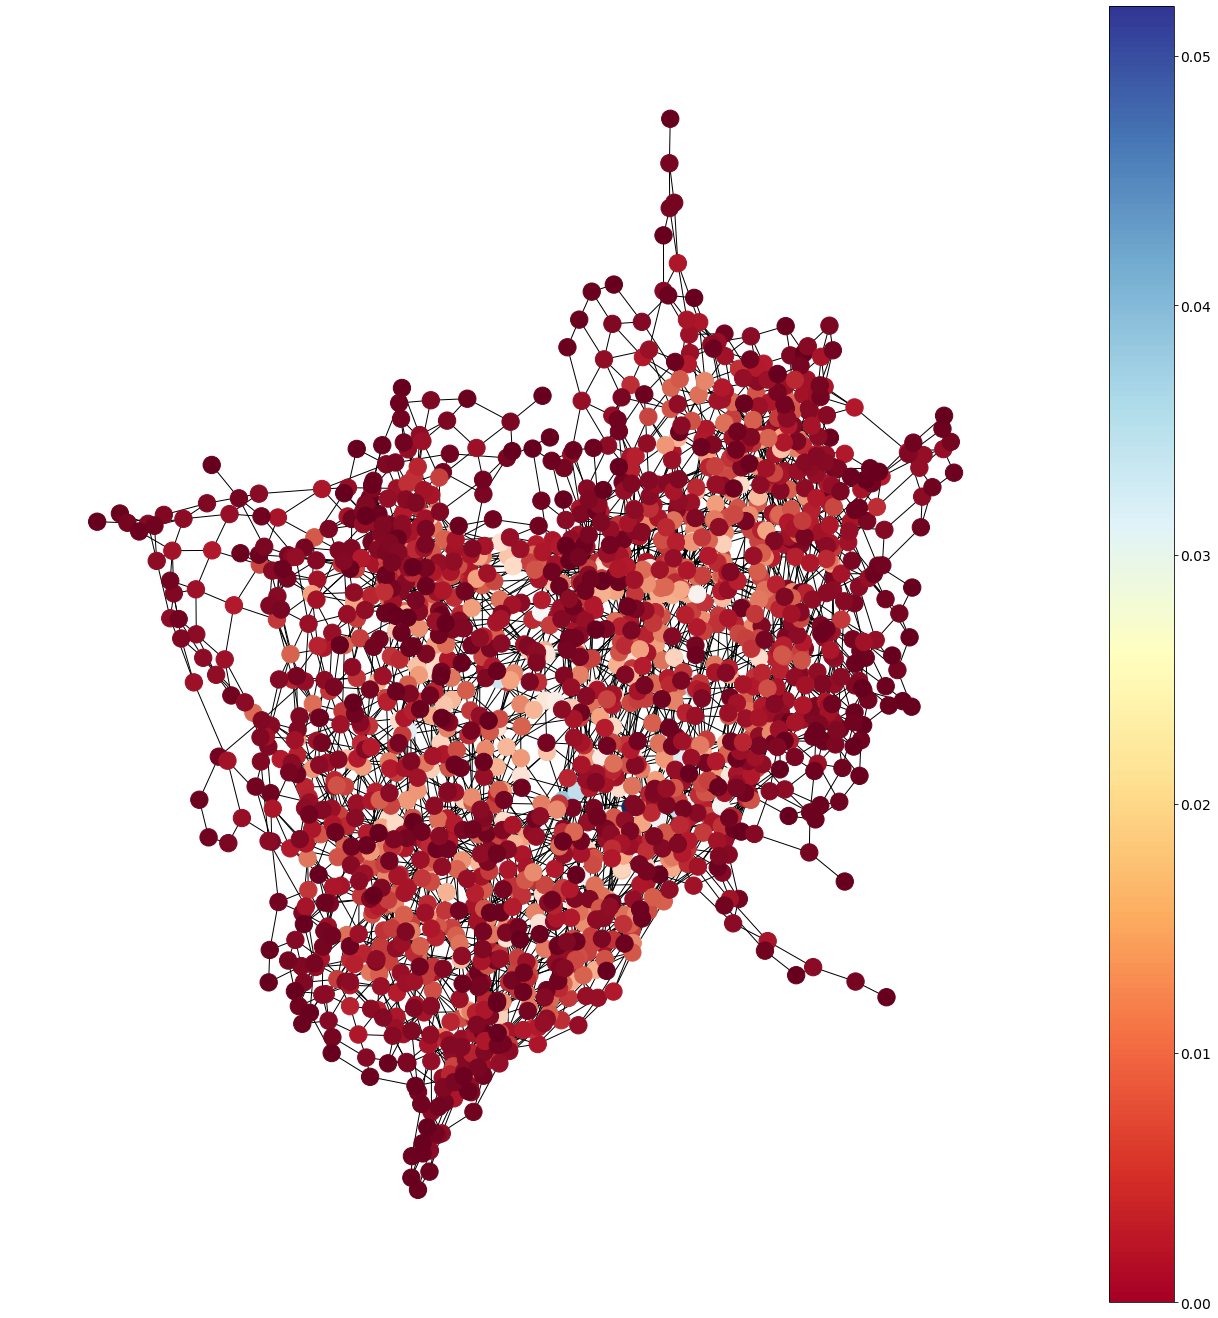

In [7]:
plt.figure(figsize = (18,18))
node_colors = [centrality[node] for node in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors, cmap=plt.cm.RdBu)
#plt.colorbar()

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []
cbar = plt.colorbar(sm)

# set the font size of the colorbar ticks
cbar.ax.tick_params(labelsize=14)

plt.show()


In [ ]:
v = np.zeros(9)

for i in ids:
    if 0 <= centrality[i] < 0.005:
        v[0] += 1
    elif 0.005<= centrality[i] < 0.01:
        v[1] += 1
    elif 0.01<= centrality[i] < 0.015:
        v[2] += 1
    elif 0.015<= centrality[i] < 0.02:
        v[3] += 1
    elif 0.02<= centrality[i] < 0.025:
        v[4] += 1
    elif 0.025<= centrality[i] < 0.03:
        v[5] += 1
    elif 0.03<= centrality[i] < 0.035:
        v[6] += 1
    elif 0.035<= centrality[i] < 0.04:
        v[7] += 1
    else:
        v[8] +=1


print(v)

In [ ]:
x = np.arange(len(v))

plt.figure(figsize=(12,12))
plt.bar(x, height=v)
plt.xticks(x, ["0 - 0.005", "0.005 - 0.01", "0.01 - 0.015", "0.015 - 0.02", "0.02 - 0.025", "0.025 - 0.03", "0.03 - 0.035", "0.035 - 0.04", "0.04 - 0.043"])

In [ ]:
percent = 10
n = int((percent * len(l))/100)
print(n)
remove = []
for i in range(0,n):
    remove.append(l[i][0])
    print(l[i][0])

In [ ]:
print (len(list))
new_list = []
for j in remove:
    for i in list:
        print(i)
        if i[0] == j or i[1] == j:
            continue
        else:
            new_list.append(i)

print(new_list)
teste = np.array(new_list)
t = np.unique(teste)
print(t)
print(len(new_list))

In [ ]:
print(G)
G.remove_edge(163)
print(G)

In [ ]:
for node in graph.nodes():
    print(node)
    nx.set_node_attributes(node, Vizinhos[node], 'percolation')
    #print(f"Node " node)


In [ ]:
a = nx.percolation_centrality(graph)
print(a)

In [ ]:
cenrality = nx.betweenness_centrality(graph)
print(cenrality)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with 20 nodes and 40 edges
G = nx.gnm_random_graph(20, 40)

nx.set_node_attributes(G, 1, 'percolation')


# Calculate percolation centrality for each node
pc = nx.percolation_centrality(G)
print(pc)
# Print the percolation centrality for each node
for node in G.nodes():
    
    print(f"Node {node}: {pc[node]}")

# Draw the graph using Matplotlib
plt.figure(figsize = (12,12))
nx.draw(G, with_labels=True)
plt.show()


In [ ]:
import networkx as nx

# Create a random graph with 20 nodes and 40 edges
G = nx.gnm_random_graph(20, 40)

# Add degree attribute to each node
degree_dict = dict(G.degree())
print(degree_dict)
nx.set_node_attributes(G, degree_dict, 'percolation')

# Calculate percolation centrality for each node
pc = nx.percolation_centrality(G)

# Print the percolation centrality for each node
for node in G.nodes():
    print(f"Node {node}: {pc[node]}")


In [ ]:
print(pc[3])